In [1]:
from imports import *

In [2]:
rootdir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/'

/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ic1954/hst/ic1954_uvis_f657n_exp_drc_sci.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ic1954/hst/ic1954_uvis_f555w_exp_drc_sci.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ic1954/hst/ic1954_uvis_f814w_exp_drc_sci.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ic1954/hst/ic1954_uvis_f657n_err_drc_wht.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ic1954/hst/ic1954_uvis_f555w_err_drc_wht.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ic1954/hst/ic1954_uvis_f814w_err_drc_wht.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_ACS_WFC.F550M.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_ACS_WFC.F555W.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_ACS_WFC.F658N.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_fi

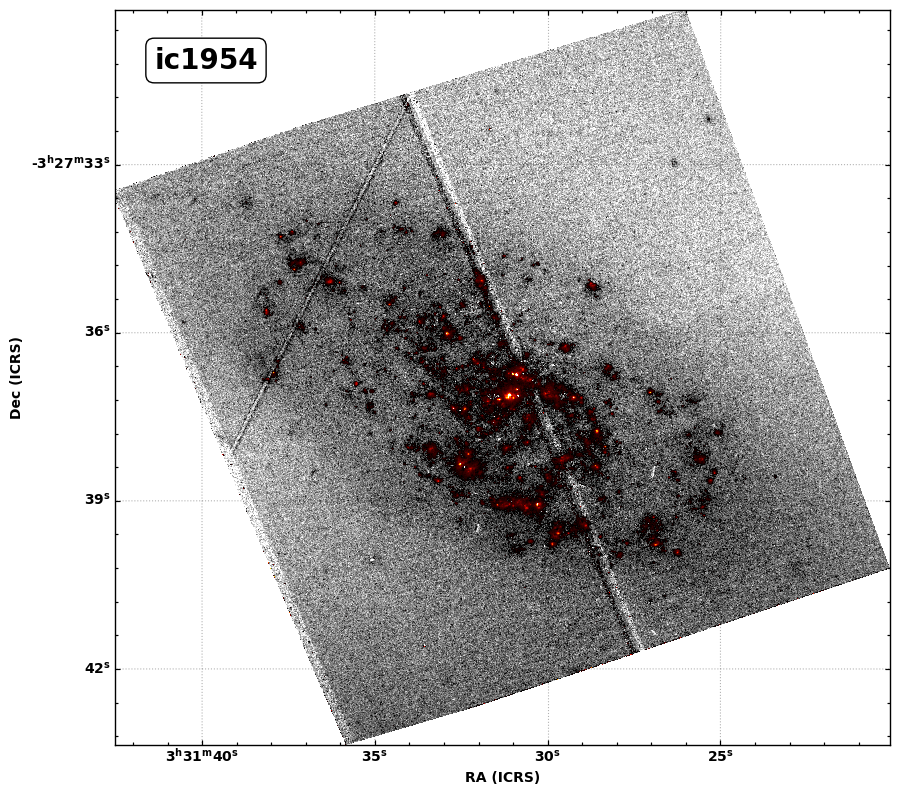

In [4]:
galaxy = 'ic1954'
filters = ['f657n', 'f555w', 'f814w']
instruments = ['uvis', 'uvis', 'uvis']

pipeline = PyHSTHAContSub(galaxy, rootdir, filters, instruments)

pipeline.load_data_hst()
pipeline.load_data_hst_inv()
pipeline.get_bandpass_info()
pipeline.get_sampletable_info()
pipeline.get_extinction()

pipeline.get_clean_paths()
pipeline.load_and_preprocess_errors()
pipeline.preprocess_hst_data()

pipeline.apply_covmask()
pipeline.convert_units()

pipeline.correct_extinction()
pipeline.subtract_continuum_witherr_hst()
pipeline.convert_to_physical_units()

pipeline.generate_map_plots()

pipeline.clean_headers()
pipeline.convert_units_to_arcsec2()
pipeline.save_hdu_files(nomuse=True)

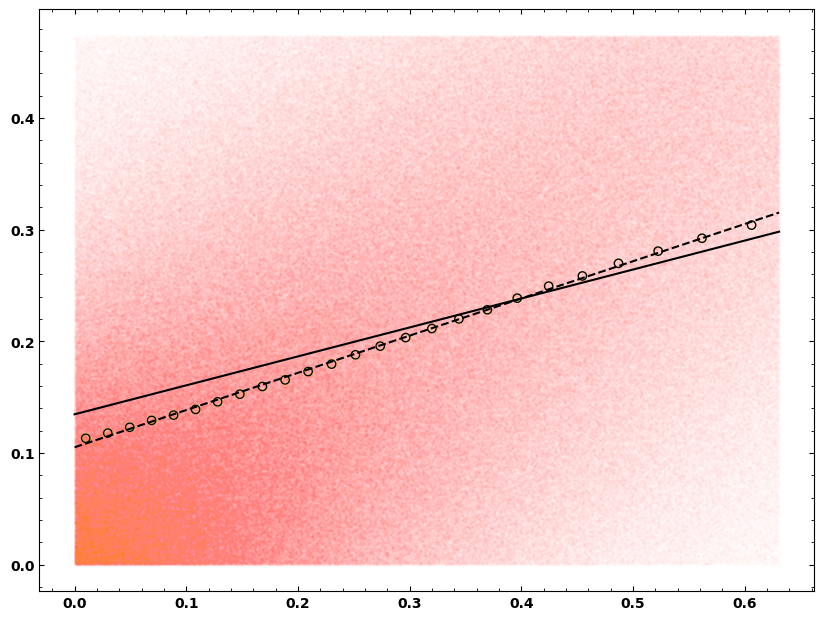

In [28]:
data1 = pipeline.hdu_data['hst_broad1'].data.flatten()
data2 = pipeline.hdu_data['hst_broad2'].data.flatten()

valid_indices = np.isfinite(data1) & np.isfinite(data2)
data1 = data1[valid_indices]
data2 = data2[valid_indices]

# Mask to only lowest value points 
x_per = np.percentile(data1, [0, 50])
y_per = np.percentile(data2, [0, 50])

x_mask = (data1>x_per[0])&(data1<x_per[1])
y_mask = (data2>y_per[0])&(data2<y_per[1])

data1 = data1[x_mask&y_mask]
data2 = data2[x_mask&y_mask]

bin_values = get_bins(data1, data2, 25, equal_spaced=False)

model_poly = models.Polynomial1D(degree=1)
fitter_poly = fitting.LinearLSQFitter() 
best_fit_poly = fitter_poly(model_poly, data1, data2)
best_fit_poly_bins = fitter_poly(model_poly, bin_values[0], bin_values[1])

xfit = np.linspace(np.nanmin(data1), np.nanmax(data1), 100)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

ax.plot(xfit, best_fit_poly(xfit), c='k')
ax.plot(xfit, best_fit_poly_bins(xfit), 'k', ls='--')

ax.scatter(bin_values[0], bin_values[1], fc='none', ec='k')
ax.scatter(data1, data2, alpha=0.005, s=2)


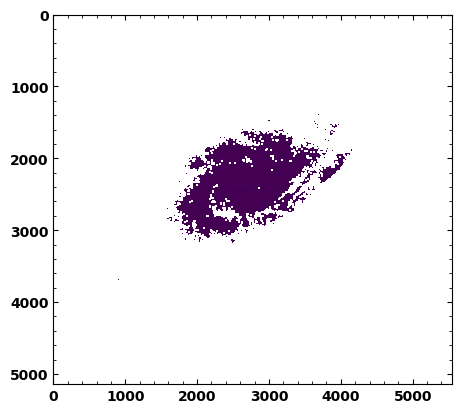

In [ ]:
plt.imshow(pipeline.hdu_data['hst_broad1'].data))